In [2]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
import nltk
nltk.download('wordnet')
import scattertext as st
import spacy

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tracywei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#Null cleaning function

def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna('')
    elif series.dtype is pd.np.dtype(int):
        return series.fillna('')
    else:
        return series.fillna('NA')

In [4]:
#Reading data
data = pd.read_csv('toxic_comments.csv', encoding='latin-1')

In [5]:
data.shape

(159571, 8)

In [6]:
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [7]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
data = data.apply(myfillna)

/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [9]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [10]:
data.comment_text[:5]

0    Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                         
1    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)                                                                                                                                                                                                                                                           

In [11]:
data.comment_text=data.comment_text.str.replace('[^a-zA-Z]', ' ')

In [12]:
RE_PREPROCESS = r'\W+|\d+' #the regular expressions that matches all non-characters
data.comment_text = np.array( [ re.sub(RE_PREPROCESS, ' ', comment).lower() for comment in data.comment_text])

In [13]:
data.comment_text.head()

0    explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now                                                                                                                                                                                                                                                                                                                                                                   
1    d aww he matches this background colour i m seemingly stuck with thanks talk january utc                                                                                                                                                                                                                                                                                                          

In [14]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0


In [15]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0


In [16]:
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0


In [17]:
# TOKENIZATION
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [19]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [20]:
data['toxic'].value_counts()

0    144277
1    15294 
Name: toxic, dtype: int64

Text(0.5, 1.0, 'Toxic vs. Friendly')

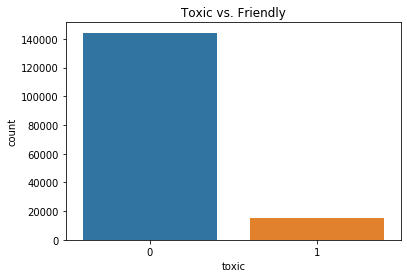

In [21]:
sns.countplot(x = "toxic", data = data)
plt.title('Toxic vs. Friendly')

In [22]:
data.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0


In [23]:
from sklearn.model_selection  import train_test_split
X = data.comment_text
y = data['toxic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=data['toxic'],random_state=2)

In [26]:
# Undersampling data
undersampled_data=data.sample(frac=0.2,random_state=2)

In [27]:
undersampled_data.drop(undersampled_data[(undersampled_data.toxic==0) & ((undersampled_data.severe_toxic==1) | 
(undersampled_data.obscene==1) | (undersampled_data.threat==1) | 
(undersampled_data.insult==1) | 
(undersampled_data.identity_hate==1))].index, inplace=True)

In [28]:
undersampled_data.drop(['id','severe_toxic','obscene','threat','insult','identity_hate'],axis=1, inplace=True)

In [29]:
from sklearn.model_selection  import train_test_split
X = undersampled_data.comment_text
y = undersampled_data['toxic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,stratify=undersampled_data['toxic'],random_state=2)

In [30]:
# Vectorization
vect=TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1, 2),max_df=0.7,min_df=30)
vect.fit(X_train)

/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/tracywei/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=30, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.LemmaTokenizer object at 0x1a3143f810>,
                use_idf=True, vocabulary=None)

In [31]:
train=vect.transform(X_train)
test=vect.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import metrics

In [33]:
y_train=np.where(y_train== 1, 1, 0)
y_test=np.where(y_test== 1, 1, 0)

In [34]:
logreg = LogisticRegression(penalty='l2', C=0.2)
logreg.fit(train, y_train)
output_log = logreg.predict(test)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_true = y_test
y_pred = output_log
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9622696493632774, 0.6582888392355707, 0.722354965325448, None)

0.9332213355732886

In [43]:
y_pred_prob_log =logreg.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_log)

0.9467565106464914

In [44]:
nb = MultinomialNB(alpha=0.3)
nb.fit(train, y_train)
output_nb = nb.predict(test)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [45]:
y_true = y_test
y_pred = output_nb
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9555266611845302, 0.7702720591774843, 0.8339552107531969, None)

0.9531709365812684

In [46]:
y_pred_prob_nb =nb.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_nb)

0.951630469665121

In [47]:
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(train,y_train)
output_rf = rf.predict(test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_true = y_test
y_pred = output_rf
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.8976442744273698, 0.8005974109850612, 0.8405609509894505, None)

0.9506509869802604

In [49]:
y_pred_prob_rf =rf.predict_proba(test)[:, 1]

In [50]:
metrics.roc_auc_score(y_true, y_pred_prob_rf)

0.9235811363745767

In [51]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Receiver Operating Characteristic for Spam classifier')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

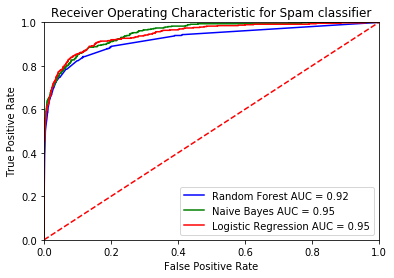

In [52]:
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_prob_nb)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_pred_prob_rf)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic for Spam classifier')

plt.plot(fpr3, tpr3, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'g', label = 'Naive Bayes AUC = %0.2f' % roc_auc2)
plt.plot(fpr1, tpr1, 'r', label = 'Logistic Regression AUC = %0.2f' % roc_auc1)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()